# Premade Couplers via Inverse Design

Using an inverse design optimizer and SCEE, various power splitting couplers at various splitting ratios have been designed and saved for future use. These can be loaded using `SiPANN.scee_opt.premade_coupler` module. We'll go through how to load them here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SiPANN import scee_opt, scee

def pltAttr(x, y, title=None, legend='upper right', save=None):
    if legend is not None:
        plt.legend(loc=legend)
    plt.xlabel(x)
    plt.ylabel(y)
    if title is not None:
        plt.title(title)
    if save is not None:
        plt.savefig(save)

## Crossover

Premade couplers can be loaded via the `SiPANN.scee_opt.premade_coupler` function. It takes in a desired percentage output of the throughport. The only percentages available are 10, 20, 30, 40, 50, and 100 (crossover). It returns a instance of `SiPANN.scee.GapFuncSymmetric` with all it's usual functions and abilities, along with the coupler length in nanometers.

If you desire other ratios, see the tutorial on `SiPANN.scee_opt.make_coupler`, where the inverse design optimizer can be used to make arbitrary splitting ratios.

In [2]:
crossover, length = scee_opt.premade_coupler(100)
crossover.gds(view=True,extra=0,units='microns')

![crossover](PreMadeCouplers_files/crossover.png)

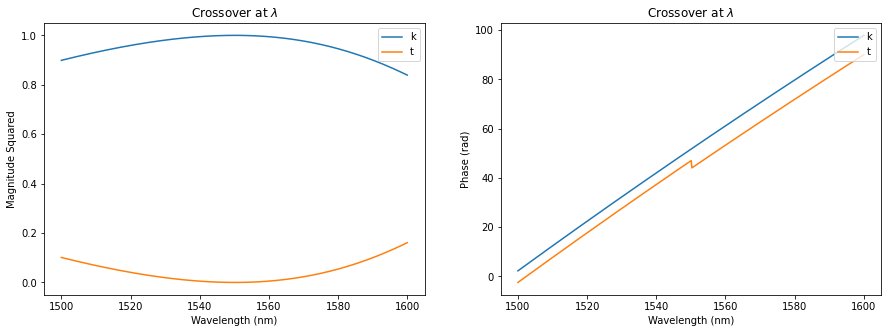

In [3]:
wavelength = np.linspace(1500, 1600, 500)
k = crossover.predict((1,4), wavelength)
t = crossover.predict((1,3), wavelength)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(wavelength, np.abs(k)**2, label='k')
plt.plot(wavelength, np.abs(t)**2, label='t')
pltAttr('Wavelength (nm)', 'Magnitude Squared', 'Crossover at $\lambda \approx 1550nm$')
plt.subplot(122)
plt.plot(wavelength, np.unwrap(np.angle(k)), label='k')
plt.plot(wavelength, np.unwrap(np.angle(t)), label='t')
pltAttr('Wavelength (nm)', 'Phase (rad)', 'Crossover at $\lambda \approx 1550nm$')

## 30/70 Splitter

For further demonstration, we also load a 30/70 splitter.

In [4]:
splitter, length = scee_opt.premade_coupler(30)
splitter.gds(view=True,extra=0,units='microns')

![splitter](PreMadeCouplers_files/splitter.png)

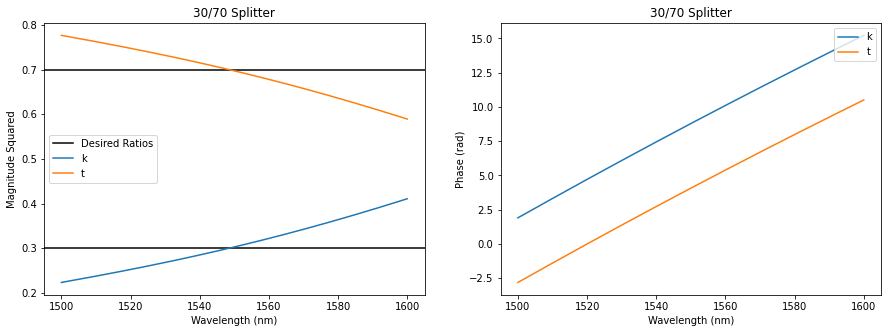

In [5]:
wavelength = np.linspace(1500, 1600, 500)
k = splitter.predict((1,4), wavelength)
t = splitter.predict((1,3), wavelength)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.axhline(.3, c='k', label="Desired Ratios")
plt.axhline(.7, c='k')
plt.plot(wavelength, np.abs(k)**2, label='k')
plt.plot(wavelength, np.abs(t)**2, label='t')
pltAttr('Wavelength (nm)', 'Magnitude Squared', '30/70 Splitter', legend='center left')
plt.subplot(122)
plt.plot(wavelength, np.unwrap(np.angle(k)), label='k')
plt.plot(wavelength, np.unwrap(np.angle(t)), label='t')
pltAttr('Wavelength (nm)', 'Phase (rad)', '30/70 Splitter')

If you'd like this tutorial as a jupyter notebook, it can be found on github, [here](https://github.com/contagon/SiPANN/blob/master/examples/Tutorials/PreMadeCouplers.ipynb)